# Study 2 Magnetic trap for plasma with Helmholtz coil

### Data used
100 particles of Hydrogen 

#### Fields:
1. Magnetic field due to a Helmholtz coil: for 100 steps each
first 100A current, orientation along the z axis [0,0,1]
second -20A current, orientation along the x axis [1,0,0]
third 50A current, orientation along the y axis [0,1,0]
2. Electric field is set to 0 throughout

#### Sampling:
1. Speeds Maxwellian sampled with plasma temperature 10000 K
2. Velocity directions uniform random sampled
3. Positions all sampled to start at [-0.5, 0, 0]
(A box 1m x 1m x 1m from [-0.5, -0.5, -0.5] to [0.5, 0.5, 0.5] maybe considered for reference)

#### Updating:
1. Duration of 1 step of update: 0.001 microseconds
2. Number of steps: 3 x 100 = 300
3. Total duration of simulation = 0.3 microseconds

#### Imports and Requirements

In [1]:
# Make imports
import import_ipynb
from run import Run
from constants import Constants
from field import Field
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from tempfile import NamedTemporaryFile
import base64 
from matplotlib import animation
from IPython.display import HTML

importing Jupyter notebook from run.ipynb
importing Jupyter notebook from batch.ipynb
importing Jupyter notebook from particle.ipynb
importing Jupyter notebook from field.ipynb
importing Jupyter notebook from constants.ipynb


In [2]:
#Create a constants object instance to access the constants from constants.ipynb file
constants = Constants()

In [3]:
# Functions for animations
VIDEO_TAG = """<video controls>
     <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
     Your browser does not support the video tag.
    </video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        f = NamedTemporaryFile(suffix='.mp4', delete=False)
        anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
        f.flush()
        video = open(f.name, "rb").read()
        f.close()
        anim._encoded_video = base64.b64encode(video).decode('utf-8')

    return VIDEO_TAG.format(anim._encoded_video)



def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

def plot_animation_3d(positions):
    '''
    This function can plot both positions and velocities
    '''

    #positions = np.array([xdata, ydata, zdata])
    FRAMES = np.shape(positions)[0]
    # Here positions has shape (198, 3) where each entry is a position which is an array of x,y,z coordinates
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    def init():
        ax.view_init(elev=10., azim=0)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[0] / FRAMES * i)
        ax.cla()
        ax.view_init(elev=10., azim=i)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        ax.scatter3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

def plot_animation_2d(positions, exclude):
    '''
    This function can plot both positions and velocities
    exclude can be 0, 1 or 2:
    if exclude = 2, this means exclude the z data of the given array and plot the x and y data
    '''
    
    available = [0,1,2]
    available.remove(exclude)
    
    #positions = np.array([xdata, ydata, zdata])
    FRAMES = np.shape(positions)[0]
    # Here positions has shape (198, 3) where each entry is a position which is an array of x,y,z coordinates
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[0] / FRAMES * i)
        ax.cla()
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        ax.scatter(positions[:current_index, available[0]], positions[:current_index, available[1]])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

def plot_animation_1d(positions, include):
    '''
    This function can plot both positions and velocities
    include can be 0, 1 or 2.
    if include = 2, this means plot the z data of the array
    '''
    
    #positions = np.array([xdata, ydata, zdata])
    FRAMES = np.shape(positions)[0]
    # Here positions has shape (198, 3) where each entry is a position which is an array of x,y,z coordinates
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[0] / FRAMES * i)
        ax.cla()
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        ax.scatter(np.arange(len(positions))[:current_index], positions[:current_index, include])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

def multiplot_animation_3d(positions):
    '''
    Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    '''

    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    def init():
        ax.view_init(elev=20., azim=0)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.view_init(elev=20., azim=i)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter3D(position[:current_index, 0], position[:current_index, 1], position[:current_index, 2])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

# Currently plots x and y positions
def multiplot_animation_2d(positions, exclude):
    '''
    Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    exclude can be 0, 1 or 2:
    if exclude = 2, this means exclude the z data of the given array and plot the x and y data
    '''
    
    available = [0,1,2]
    available.remove(exclude)
    
    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter(position[:current_index, available[0]], position[:current_index, available[1]])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

def multiplot_animation_1d(positions, include):
    '''Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    include can be 0, 1 or 2.
    if include = 2, this means plot the z data of the array
    '''
    
    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter(np.arange(len(position))[:current_index], position[:current_index, include])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

#### Create the system and run the simulation

In [4]:
# Create a run object instance
s2 = Run()

In [5]:
#### Same as study 1 for now

# Create 100 Hydrogen ions whose:
# speeds are Maxwellian sampled, velocity directions are uniform randomly sampled
# positions are all sampled such that particles start at [-0.5, 0, 0] 
# a chamber 1m x 1m x 1m with extreme points [-0.5, -0.5, -0.5] and [0.5, 0.5, 0.5] considered
s2.create_batch_with_file_initialization('H+', constants.constants['e'][0],\
                                          constants.constants['m_H'][0] * constants.constants['amu'][0], \
                                          100, 100, 'H ions', r_index=0, v_index=1)

In [10]:
# This was done to plot and save the maxwellian sampled initial speeds.
'''
iniv = []
s2_batch1 = s2.batches[0]['H ions']
s2_batch1_particles = s2_batch1.particles
for j in range(len(s2_batch1_particles)):
    iniv.append(s2_batch1_particles[j].v)
inspeeds = []
def norm(x, y, z):
    return np.sqrt((x*x)+(y*y)+(z*z))
for i in range(len(iniv)):
    inspeeds.append(norm(iniv[i][0], iniv[i][1], iniv[i][2]))
inspeeds = np.array(inspeeds)
plt.hist(inspeeds, 20)
plt.savefig('maxwellianspeedsampling', dpi='figure', format='png')
'''

In [15]:
s2_index_update = 0 # Update the first batch in this Run instance 
s2_particle_track_indices = [i for i in range(100)] # Track all 100 particles
s2_dT = 10**(-7) # 0.1 microseconds 
s2_stepT = 10**(-9) # 0.001 microseconds time step
s2_Nsteps = int(s2_dT/s2_stepT)+1

s2_batch_ps_and_vs = dict()
for i in range(100): # 100 is number of particles
    s2_batch_ps_and_vs[i] = []

s2_batch1 = s2.batches[0]['H ions'] # take current batch
s2_field = Field()

# Electric field is set to zero
# Magnetic field along z axis
for i in range(s2_Nsteps):
    for j in range(len(s2_batch1.particles)):
        #argsE = s2_field.radial_E_field(s2_batch1.particles[j].r, V=100, center = [0,0,0])
        argsE=0
        argsB = s2_field.helmholtz_coil_B_field(n=1000, I=20, R=0.1, B_hat=[0,0,1], mu_0=constants.constants['mu_0'][0])
        # I was 100 along z axis or 20 along z axis
        args = (s2_field, s2_stepT, argsE, argsB)
        s2_batch1.particles[j].update(args)
        ithUpdateForAParticle = (i, s2_batch1.particles[j].r, s2_batch1.particles[j].v)
        s2_batch_ps_and_vs[j].append(ithUpdateForAParticle)

# Electric field is set to zero
# Magnetic field along x axis
for i in range(s2_Nsteps):
    for j in range(len(s2_batch1.particles)):
        argsE=0
        #argsE = s2_field.radial_E_field(s2_batch1.particles[j].r, V=100, center = [0,0,0])
        argsB = s2_field.helmholtz_coil_B_field(n=1000, I=-20, R=0.1, B_hat=[0,0,1], mu_0=constants.constants['mu_0'][0])
        # I was -20 along x axis or -20 along z axis
        args = (s2_field, s2_stepT, argsE, argsB)
        s2_batch1.particles[j].update(args)
        ithUpdateForAParticle = (i, s2_batch1.particles[j].r, s2_batch1.particles[j].v)
        s2_batch_ps_and_vs[j].append(ithUpdateForAParticle)
        
# Electric field is set to zero
# Magnetic field along y axis
for i in range(s2_Nsteps):
    for j in range(len(s2_batch1.particles)):
        argsE=0
        #argsE = s2_field.radial_E_field(s2_batch1.particles[j].r, V=100, center = [0,0,0])
        argsB = s2_field.helmholtz_coil_B_field(n=1000, I=20, R=0.1, B_hat=[0,0,1], mu_0=constants.constants['mu_0'][0])
        # I was 50 along y axis or 20 along z axis
        args = (s2_field, s2_stepT, argsE, argsB)
        s2_batch1.particles[j].update(args)
        ithUpdateForAParticle = (i, s2_batch1.particles[j].r, s2_batch1.particles[j].v)
        s2_batch_ps_and_vs[j].append(ithUpdateForAParticle)


'''
s2_batch_ps_and_vs will be of the form : 
{ 0 (means 0th particle): [(0 (means 0th timestep), array of position, array of velocity)]
     }

so it is a dictionary whose keys are strings particle numbers and 
values are particles update history which is:
        [list of tuples (time step, position, velocity) ]
'''

'\ns2_batch_ps_and_vs will be of the form : \n{ 0 (means 0th particle): [(0 (means 0th timestep), array of position, array of velocity)]\n     }\n\nso it is a dictionary whose keys are strings particle numbers and \nvalues are particles update history which is:\n        [list of tuples (time step, position, velocity) ]\n'

#### Plots and Animations

In [16]:
# Take positions and velocities of the particle at index 0
s2_allfield_p0_ps = []
s2_allfield_p0_vs = []
s2_p0 = s2_batch_ps_and_vs[0]
for i in range(len(s2_p0)):
        s2_allfield_p0_ps.append(s2_p0[i][1])
        s2_allfield_p0_vs.append(s2_p0[i][2])
s2_allfield_p0_ps = np.array(s2_allfield_p0_ps)
s2_allfield_p0_vs = np.array(s2_allfield_p0_vs)

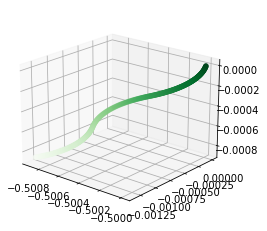

In [17]:
# Plot the positions of the particle at index 0
s2_allfield_p0_ps_fig = plt.figure()
s2_allfield_p0_ps_ax = plt.axes(projection='3d')
s2_allfield_p0_ps_ax.view_init(20, -50)

# Data for three-dimensional scattered points
# for position update history of particle 0 during all field configurations
s2_allfield_p0_ps_zdata = [elem[2] for elem in s2_allfield_p0_ps] # Animate this plot as well.
s2_allfield_p0_ps_xdata = [elem[0] for elem in s2_allfield_p0_ps]
s2_allfield_p0_ps_ydata = [elem[1] for elem in s2_allfield_p0_ps]
s2_allfield_p0_ps_ax.scatter3D(s2_allfield_p0_ps_xdata, s2_allfield_p0_ps_ydata, s2_allfield_p0_ps_zdata,\
                            c=s2_allfield_p0_ps_zdata, cmap='Greens');
#plt.savefig('ps2', dpi='figure', format='png')

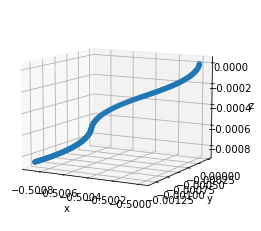

In [18]:
# Animate the position of the particle at index 0
s2_allfield_p0_ps_anim = plot_animation_3d(s2_allfield_p0_ps)
#display_animation(s2_allfield_p0_ps_anim)
#s2_allfield_p0_ps_anim.save(r'ps2.mp4')

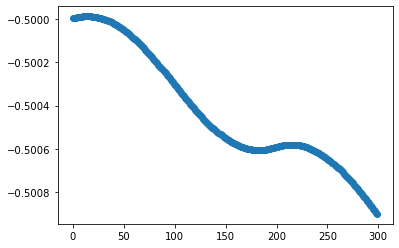

In [9]:
# Plot x position
s2_allfield_p0_ps_x_fig = plt.figure()
s2_allfield_p0_ps_x_ax = plt.axes()
s2_allfield_p0_ps_x_ax.scatter(np.arange(len(s2_allfield_p0_ps_xdata)), s2_allfield_p0_ps_xdata);
#plt.savefig('psx2', dpi='figure', format='png')

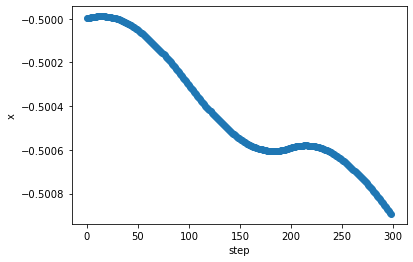

In [20]:
# Animate x position
s2_allfield_p0_ps_x_anim = plot_animation_1d(s2_allfield_p0_ps, include=0)
#display_animation(s2_allfield_p0_ps_x_anim)
#s2_allfield_p0_ps_x_anim.save(r'psx2.mp4')

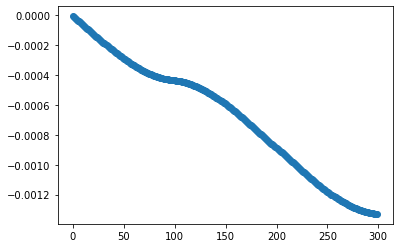

In [10]:
# Plot y position
s2_allfield_p0_ps_y_fig = plt.figure()
s2_allfield_p0_ps_y_ax = plt.axes()
s2_allfield_p0_ps_y_ax.scatter(np.arange(len(s2_allfield_p0_ps_ydata)), s2_allfield_p0_ps_ydata);
plt.savefig('psy2', dpi='figure', format='png')

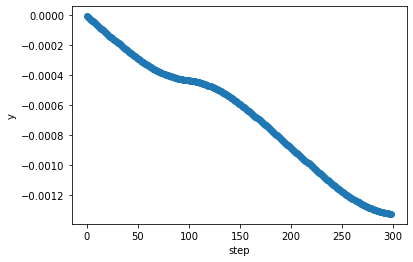

In [22]:
# Animate y position
s2_allfield_p0_ps_y_anim = plot_animation_1d(s2_allfield_p0_ps, include=1)
#display_animation(s2_allfield_p0_ps_y_anim)
#s2_allfield_p0_ps_y_anim.save(r'psy2.mp4')

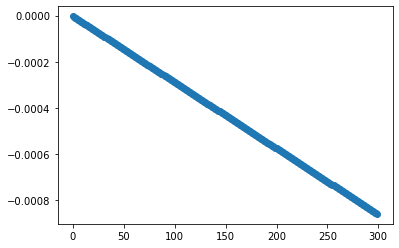

In [11]:
# Plot z position
s2_allfield_p0_ps_z_fig = plt.figure()
s2_allfield_p0_ps_z_ax = plt.axes()
s2_allfield_p0_ps_z_ax.scatter(np.arange(len(s2_allfield_p0_ps_zdata)), s2_allfield_p0_ps_zdata);
#plt.savefig('psz2', dpi='figure', format='png')

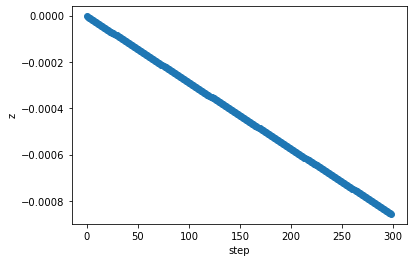

In [24]:
# Animate z position
s2_allfield_p0_ps_z_anim = plot_animation_1d(s2_allfield_p0_ps, include=2)
#display_animation(s2_allfield_p0_ps_z_anim)
#s2_allfield_p0_ps_z_anim.save(r'psz2.mp4')

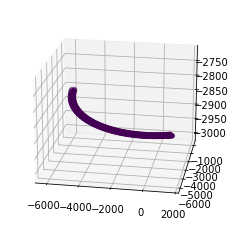

In [16]:
# Plot the velocity of the particle at index 0
s2_allfield_p0_vs_fig = plt.figure()
s2_allfield_p0_vs_ax = plt.axes(projection='3d')
s2_allfield_p0_vs_ax.view_init(20, -80)

# Data for three-dimensional scattered points
# for position update history of particle 0 during all field configurations
s2_allfield_p0_vs_zdata = [elem[2] for elem in s2_allfield_p0_vs] # Animate this plot as well.
s2_allfield_p0_vs_xdata = [elem[0] for elem in s2_allfield_p0_vs]
s2_allfield_p0_vs_ydata = [elem[1] for elem in s2_allfield_p0_vs]
s2_allfield_p0_vs_ax.scatter3D(s2_allfield_p0_vs_xdata, s2_allfield_p0_vs_ydata, s2_allfield_p0_vs_zdata,\
                            c=s2_allfield_p0_vs_zdata);
#plt.savefig('vs2', dpi='figure', format='png')

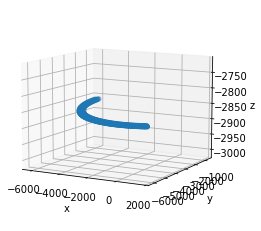

In [26]:
# Animate the velocity
s2_allfield_p0_vs_anim = plot_animation_3d(s2_allfield_p0_vs)
#display_animation(s2_allfield_p0_vs_anim)
#s2_allfield_p0_vs_anim.save(r'vs2.mp4')

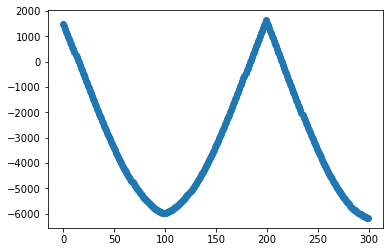

In [17]:
# Plot x velocity
s2_allfield_p0_vs_x_fig = plt.figure()
s2_allfield_p0_vs_x_ax = plt.axes()
s2_allfield_p0_vs_x_ax.scatter(np.arange(len(s2_allfield_p0_vs_xdata)), s2_allfield_p0_vs_xdata);
#plt.savefig('vsx2', dpi='figure', format='png')

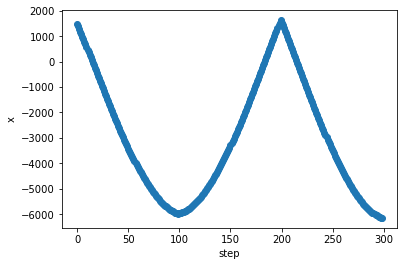

In [28]:
# Animate x velocity
s2_allfield_p0_vs_x_anim = plot_animation_1d(s2_allfield_p0_vs, include=0)
#display_animation(s2_allfield_p0_vs_x_anim)
#s2_allfield_p0_vs_x_anim.save(r'vsx2.mp4')

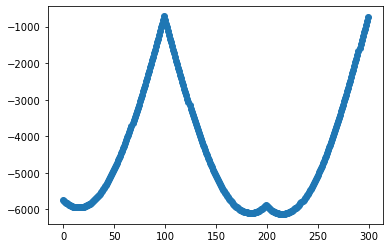

In [18]:
# Plot y velocity
s2_allfield_p0_vs_y_fig = plt.figure()
s2_allfield_p0_vs_y_ax = plt.axes()
s2_allfield_p0_vs_y_ax.scatter(np.arange(len(s2_allfield_p0_vs_ydata)), s2_allfield_p0_vs_ydata);
#plt.savefig('vsy2', dpi='figure', format='png')

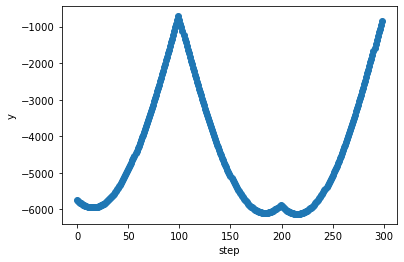

In [30]:
# Animate y velocity
s2_allfield_p0_vs_y_anim = plot_animation_1d(s2_allfield_p0_vs, include=1)
#display_animation(s2_allfield_p0_vs_y_anim)
#s2_allfield_p0_vs_y_anim.save(r'vsy2.mp4')

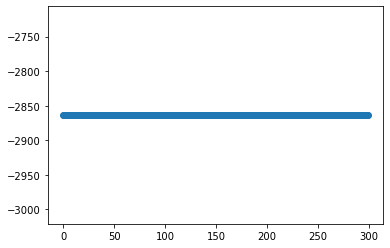

In [19]:
# Plot z velocity
s2_allfield_p0_vs_z_fig = plt.figure()
s2_allfield_p0_vs_z_ax = plt.axes()
s2_allfield_p0_vs_z_ax.scatter(np.arange(len(s2_allfield_p0_vs_zdata)), s2_allfield_p0_vs_zdata);
#plt.savefig('vsz2', dpi='figure', format='png')

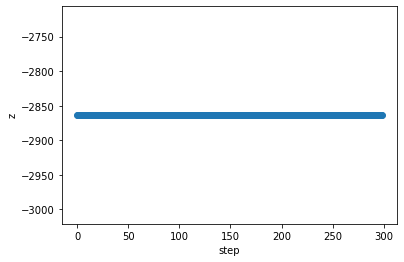

In [32]:
# Animate z velocity
s2_allfield_p0_vs_z_anim = plot_animation_1d(s2_allfield_p0_vs, include=2)
#display_animation(s2_allfield_p0_vs_z_anim)
#s2_allfield_p0_vs_z_anim.save(r'vsz2.mp4')

In [20]:
# Take positions and velocities for 10 particles
s2_particles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] # take particles at these indices
s2_allfield_10p_ps = []
s2_allfield_10p_vs = []

for aparticle in s2_particles:
    # Same procedure for as a single particle
    s2_allfield_ap_ps = []
    s2_allfield_ap_vs = []
    s2_ap = s2_batch_ps_and_vs[aparticle]
    for i in range(len(s2_ap)):
            s2_allfield_ap_ps.append(s2_ap[i][1])
            s2_allfield_ap_vs.append(s2_ap[i][2])
    s2_allfield_ap_ps = np.array(s2_allfield_ap_ps)
    s2_allfield_ap_vs = np.array(s2_allfield_ap_vs)
    
    s2_allfield_10p_ps.append(s2_allfield_ap_ps)
    s2_allfield_10p_vs.append(s2_allfield_ap_vs)

s2_allfield_10p_ps = np.array(s2_allfield_10p_ps)
s2_allfield_10p_vs = np.array(s2_allfield_10p_vs)

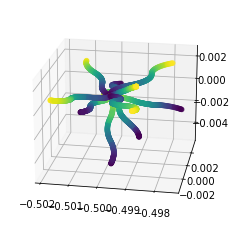

In [21]:
# Plot the positions for the particles
s2_allfield_10p_ps_fig = plt.figure()
s2_allfield_10p_ps_ax = plt.axes(projection='3d')
s2_allfield_10p_ps_ax.view_init(20, -80)

# Data for three-dimensional scattered points
for i in range(len(s2_particles)):
    
    s2_allfield_ap_ps_zdata = [elem[2] for elem in s2_allfield_10p_ps[i]] # Animate this plot as well.
    s2_allfield_ap_ps_xdata = [elem[0] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_ap_ps_ydata = [elem[1] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_10p_ps_ax.scatter3D(s2_allfield_ap_ps_xdata, s2_allfield_ap_ps_ydata, s2_allfield_ap_ps_zdata,\
                            c=s2_allfield_ap_ps_zdata);
#plt.savefig('multips2', dpi='figure', format='png')

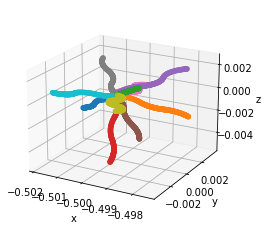

In [35]:
# Animate the positions
s2_allfield_10p_ps_anim = multiplot_animation_3d(s2_allfield_10p_ps)
#display_animation(s2_allfield_10p_ps_anim)
#s2_allfield_10p_ps_anim.save(r'multips2.mp4')

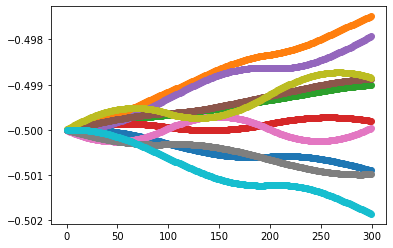

In [22]:
# Plot x positions
s2_allfield_10p_ps_x_fig = plt.figure()
s2_allfield_10p_ps_x_ax = plt.axes()
for i in range(len(s2_particles)):
    #s2_allfield_ap_ps_zdata = [elem[2] for elem in s2_allfield_10p_ps[i]] # Animate this plot as well.
    s2_allfield_ap_ps_xdata = [elem[0] for elem in s2_allfield_10p_ps[i]]
    #s2_allfield_ap_ps_ydata = [elem[1] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_10p_ps_x_ax.scatter(np.arange(len(s2_allfield_ap_ps_xdata)), s2_allfield_ap_ps_xdata);
#plt.savefig('multipsx2', dpi='figure', format='png')

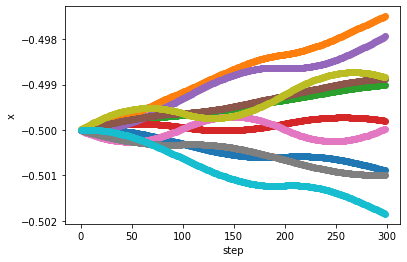

In [37]:
# Animate x positions
s2_allfield_10p_ps_x_anim = multiplot_animation_1d(s2_allfield_10p_ps, include=0)
#display_animation(s2_allfield_10p_ps_x_anim)
#s2_allfield_10p_ps_x_anim.save(r'multipsx2.mp4')

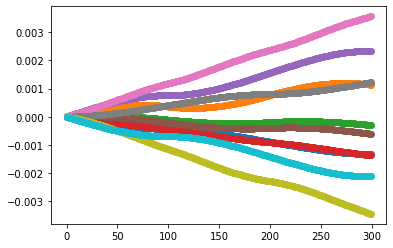

In [23]:
# Plot y positions
s2_allfield_10p_ps_y_fig = plt.figure()
s2_allfield_10p_ps_y_ax = plt.axes()
for i in range(len(s2_particles)):
    #s2_allfield_ap_ps_zdata = [elem[2] for elem in s2_allfield_10p_ps[i]] # Animate this plot as well.
    #s2_allfield_ap_ps_xdata = [elem[0] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_ap_ps_ydata = [elem[1] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_10p_ps_y_ax.scatter(np.arange(len(s2_allfield_ap_ps_ydata)), s2_allfield_ap_ps_ydata);
#plt.savefig('multipsy2', dpi='figure', format='png')

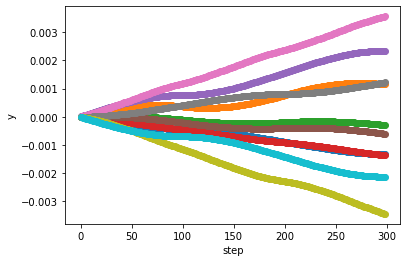

In [39]:
# Animate y positions
s2_allfield_10p_ps_y_anim = multiplot_animation_1d(s2_allfield_10p_ps, include=1)
#display_animation(s2_allfield_10p_ps_y_anim)
#s2_allfield_10p_ps_y_anim.save(r'multipsy2.mp4')

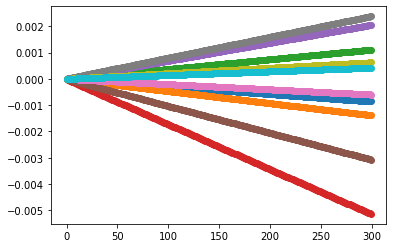

In [24]:
# Plot z positions
s2_allfield_10p_ps_z_fig = plt.figure()
s2_allfield_10p_ps_z_ax = plt.axes()
for i in range(len(s2_particles)):
    s2_allfield_ap_ps_zdata = [elem[2] for elem in s2_allfield_10p_ps[i]] # Animate this plot as well.
    #s2_allfield_ap_ps_xdata = [elem[0] for elem in s2_allfield_10p_ps[i]]
    #s2_allfield_ap_ps_ydata = [elem[1] for elem in s2_allfield_10p_ps[i]]
    s2_allfield_10p_ps_z_ax.scatter(np.arange(len(s2_allfield_ap_ps_zdata)), s2_allfield_ap_ps_zdata);
#plt.savefig('multipsz2', dpi='figure', format='png')

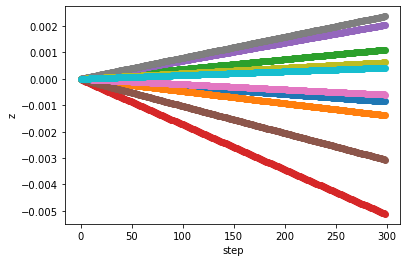

In [41]:
# Animate z positions
s2_allfield_10p_ps_z_anim = multiplot_animation_1d(s2_allfield_10p_ps, include=2)
#display_animation(s2_allfield_10p_ps_z_anim)
#s2_allfield_10p_ps_z_anim.save(r'multipsz2.mp4')

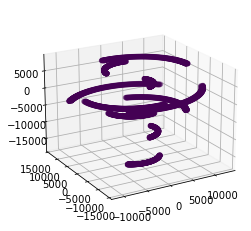

In [26]:
# Plot the velocities
s2_allfield_10p_vs_fig = plt.figure()
s2_allfield_10p_vs_ax = plt.axes(projection='3d')
s2_allfield_10p_vs_ax.view_init(20, -120)

# Data for three-dimensional scattered points
for i in range(len(s2_particles)):
    
    s2_allfield_ap_vs_zdata = [elem[2] for elem in s2_allfield_10p_vs[i]] # Animate this plot as well.
    s2_allfield_ap_vs_xdata = [elem[0] for elem in s2_allfield_10p_vs[i]]
    s2_allfield_ap_vs_ydata = [elem[1] for elem in s2_allfield_10p_vs[i]]
    s2_allfield_10p_vs_ax.scatter3D(s2_allfield_ap_vs_xdata, s2_allfield_ap_vs_ydata, s2_allfield_ap_vs_zdata,\
                            c=s2_allfield_p0_vs_zdata);
#plt.savefig('multivs2', dpi='figure', format='png')

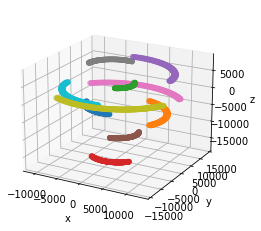

In [43]:
# Animate the velocities
s2_allfield_10p_vs_anim = multiplot_animation_3d(s2_allfield_10p_vs)
#display_animation(s2_allfield_10p_vs_anim)
#s2_allfield_10p_vs_anim.save(r'multivs2.mp4')

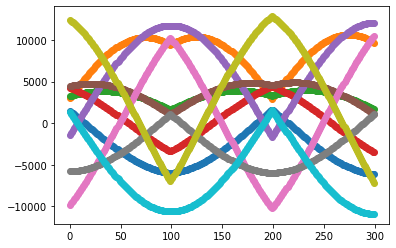

In [27]:
# Plot x velocities
s2_allfield_10p_vs_x_fig = plt.figure()
s2_allfield_10p_vs_x_ax = plt.axes()
for i in range(len(s2_particles)):
    #s2_allfield_ap_vs_zdata = [elem[2] for elem in s2_allfield_10p_vs[i]] # Animate this plot as well.
    s2_allfield_ap_vs_xdata = [elem[0] for elem in s2_allfield_10p_vs[i]]
    #s2_allfield_ap_vs_ydata = [elem[1] for elem in s2_allfield_10p_vs[i]]
    s2_allfield_10p_vs_x_ax.scatter(np.arange(len(s2_allfield_ap_vs_xdata)), s2_allfield_ap_vs_xdata);
#plt.savefig('multivsx2', dpi='figure', format='png')

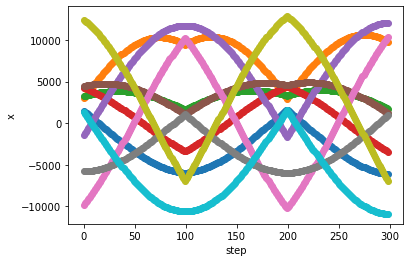

In [45]:
# Animate x velocities
s2_allfield_10p_vs_x_anim = multiplot_animation_1d(s2_allfield_10p_vs, include=0)
#display_animation(s2_allfield_10p_vs_x_anim)
#s2_allfield_10p_vs_x_anim.save(r'multivsx2.mp4')

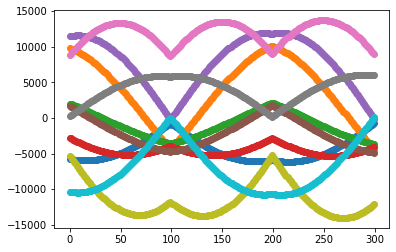

In [28]:
# Plot y velocities
s2_allfield_10p_vs_y_fig = plt.figure()
s2_allfield_10p_vs_y_ax = plt.axes()
for i in range(len(s2_particles)):
    #s2_allfield_ap_vs_zdata = [elem[2] for elem in s2_allfield_10p_vs[i]] # Animate this plot as well.
    #s2_allfield_ap_vs_xdata = [elem[0] for elem in s2_allfield_10p_vs[i]]
    s2_allfield_ap_vs_ydata = [elem[1] for elem in s2_allfield_10p_vs[i]]
    s2_allfield_10p_vs_y_ax.scatter(np.arange(len(s2_allfield_ap_vs_ydata)), s2_allfield_ap_vs_ydata);
#plt.savefig('multivsy2', dpi='figure', format='png')

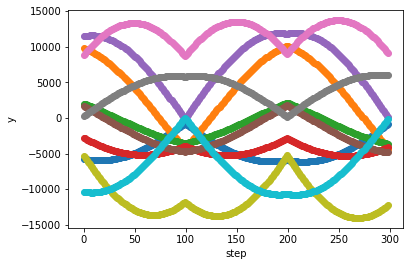

In [47]:
# Animate y velocities
s2_allfield_10p_vs_y_anim = multiplot_animation_1d(s2_allfield_10p_vs, include=1)
#display_animation(s2_allfield_10p_vs_y_anim)
#s2_allfield_10p_vs_y_anim.save(r'multivsy2.mp4')

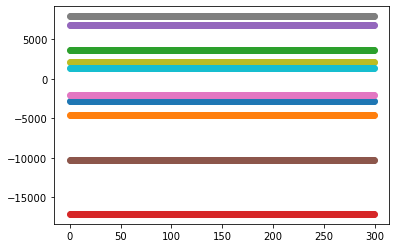

In [29]:
# Plot z velocities
s2_allfield_10p_vs_z_fig = plt.figure()
s2_allfield_10p_vs_z_ax = plt.axes()
for i in range(len(s2_particles)):
    s2_allfield_ap_vs_zdata = [elem[2] for elem in s2_allfield_10p_vs[i]] # Animate this plot as well.
    #s2_allfield_ap_vs_xdata = [elem[0] for elem in s2_allfield_10p_vs[i]]
    #s2_allfield_ap_vs_ydata = [elem[1] for elem in s2_allfield_10p_vs[i]]
    s2_allfield_10p_vs_z_ax.scatter(np.arange(len(s2_allfield_ap_vs_zdata)), s2_allfield_ap_vs_zdata);
#plt.savefig('multivsz2', dpi='figure', format='png')

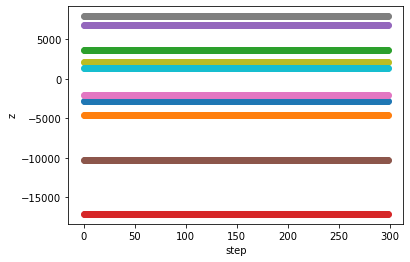

In [49]:
# Animate z velocities
s2_allfield_10p_vs_z_anim = multiplot_animation_1d(s2_allfield_10p_vs, include=2)

# call our new function to display the animation
#display_animation(s2_allfield_10p_vs_z_anim)
#s2_allfield_10p_vs_z_anim.save(r'multivsz2.mp4')